# Installing Packages

In [0]:
!pip install --no-cache-dir torch-tensornet

# Imports
Importing necessary packages and modules

In [0]:
%matplotlib inline

import matplotlib.pyplot as plt

from tensornet.data import CIFAR10
from tensornet.model import ResNet18
from tensornet.model.utils.loss import cross_entropy_loss
from tensornet.model.utils.optimizers import sgd
from tensornet.utils import initialize_cuda, class_level_accuracy

# Configuration

Set various parameters and hyperparameters

In [0]:
class Args:

    # Data Loading
    # ============

    train_batch_size = 64
    val_batch_size = 64
    num_workers = 4

    # Augmentation
    # ============
    horizontal_flip_prob = 0.2
    rotate_degree = 20
    cutout_prob = 0.3
    cutout_dim = (8, 8)

    # Training
    # ========
    random_seed = 1
    epochs = 30
    learning_rate = 0.01
    momentum = 0.9

## Set Seed and Get GPU Availability

In [6]:
# Initialize CUDA and set random seed
cuda, device = initialize_cuda(Args.random_seed)

GPU Available? True


## Download Dataset

Importing the CIFAR-10 class to download dataset and create data loader

In [9]:
dataset = CIFAR10(
    train_batch_size=Args.train_batch_size,
    val_batch_size=Args.val_batch_size,
    cuda=cuda,
    num_workers=Args.num_workers,
    horizontal_flip_prob=Args.horizontal_flip_prob,
    rotate_degree=Args.rotate_degree,
    cutout_prob=Args.cutout_prob,
    cutout_dim=Args.cutout_dim
)

Extracting /usr/local/lib/python3.6/dist-packages/tensornet/data/cifar10/cifar-10-python.tar.gz to /usr/local/lib/python3.6/dist-packages/tensornet/data/cifar10
Files already downloaded and verified
Files already downloaded and verified


## Data Visualization
Let's see how our data looks like. This information will help us decide the transformations that can be used on the dataset.

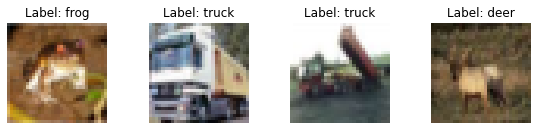

In [10]:
# Fetch data
classes = dataset.classes
sample_data, sample_targets = dataset.data()

# Set number of images to display
num_images = 4

# Display images with labels
fig, axs = plt.subplots(1, 4, figsize=(8, 8))
fig.tight_layout()

for i in range(num_images):
    axs[i].axis('off')
    axs[i].set_title(f'Label: {classes[sample_targets[i]]}')
    axs[i].imshow(sample_data[i])

## Training and Validation Dataloaders
This is the final step in data preparation. It sets the dataloader arguments and then creates the dataloader

In [0]:
# Create train data loader
train_loader = dataset.loader(train=True)

# Create val data loader
val_loader = dataset.loader(train=False)

# Model Architecture and Summary

In [12]:
model = ResNet18().to(device)  # Create model
model.summary(dataset.image_size)  # Display model summary

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1, 128,

# Model Training and Validation

In [13]:
criterion = cross_entropy_loss()  # Create loss function
optimizer = sgd(model, Args.learning_rate, Args.momentum)  # Create optimizer

model.fit(
    train_loader,
    optimizer,
    criterion,
    device=device,
    epochs=Args.epochs,
    val_loader=val_loader
)

Epoch 1:
782/782 [========] - 32s 41ms/step - loss: 1.3638 - accuracy: 40.5131
Validation set: Average loss: 0.0158, Accuracy: 64.62%

Epoch 2:
782/782 [========] - 32s 40ms/step - loss: 0.8800 - accuracy: 56.0243
Validation set: Average loss: 0.0117, Accuracy: 74.56%

Epoch 3:
782/782 [========] - 31s 40ms/step - loss: 0.6911 - accuracy: 62.9721
Validation set: Average loss: 0.0104, Accuracy: 77.18%

Epoch 4:
782/782 [========] - 31s 40ms/step - loss: 0.5886 - accuracy: 67.3007
Validation set: Average loss: 0.0107, Accuracy: 77.70%

Epoch 5:
782/782 [========] - 31s 40ms/step - loss: 0.5071 - accuracy: 70.3662
Validation set: Average loss: 0.0085, Accuracy: 81.55%

Epoch 6:
782/782 [========] - 32s 40ms/step - loss: 0.4529 - accuracy: 72.7218
Validation set: Average loss: 0.0086, Accuracy: 82.62%

Epoch 7:
782/782 [========] - 31s 40ms/step - loss: 0.4037 - accuracy: 74.6512
Validation set: Average loss: 0.0075, Accuracy: 84.15%

Epoch 8:
782/782 [========] - 31s 40ms/step - loss: 0.3

## Result Analysis

Displaying accuracy for each class in the entire validation dataset

In [14]:
class_level_accuracy(model, val_loader, device, classes)

Accuracy of plane : 90 %
Accuracy of   car : 91 %
Accuracy of  bird : 87 %
Accuracy of   cat : 84 %
Accuracy of  deer : 88 %
Accuracy of   dog : 77 %
Accuracy of  frog : 88 %
Accuracy of horse : 89 %
Accuracy of  ship : 94 %
Accuracy of truck : 96 %
